# Pathing Demo notebook

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from textwrap import wrap

from pathutils import (get_popular_urls, funnel_in_outs,funnel_stats, sankey_funnel, 
                       frequent_funnel, analyze_clicks, analyze_traffic, utils, manage_resolutions, 
                       url_regex_resolver, analyze_timing)

In [2]:
#HAUSERDIR = "<Path to your Hauser folder>"
HAUSERDIR = "sampledata"

# `LIMITROWS` limits the number of rows in the output of most popular URLs
LIMITROWS = 0

## Load Data Export data into a dataframe

In [3]:
dffull = analyze_traffic.get_hauser_as_df(HAUSERDIR, navigate_only=False)
dffull = utils.preproc_events(dffull)

Read file: sampledata/156643200048.json
Read file: sampledata/156617280048.json
Read file: sampledata/156625920048.json
Read file: sampledata/156608640048.json
Read file: sampledata/156591360048.json
Read file: sampledata/156651840048.json
Read file: sampledata/156634560048.json
Read file: sampledata/156600000048.json


## Inspect your dataframe(s)
You can find Data Export field descriptions on FullStory's API reference site: https://developer.fullstory.com/get-data-export

In [7]:
dffull.head(15)

i            IndvId  \
sid                              idx                           
45036252179005445266863488532480 0    7610  4503625217900544   
                                 1    7611  4503625217900544   
                                 2    7612  4503625217900544   
45039947874631685488140640878592 0     899  4503994787463168   
                                 1     900  4503994787463168   
                                 2     901  4503994787463168   
                                 3     902  4503994787463168   
                                 4     903  4503994787463168   
                                 5     904  4503994787463168   
                                 6     905  4503994787463168   
                                 7     906  4503994787463168   
                                 8     907  4503994787463168   
                                 9     908  4503994787463168   
                                 10    909  4503994787463168   
                                 11    910  4503994787463168   

                                                UserId         SessionId  \
sid                              idx                                       
45036252179005445266863488532480 0    4503625217900544  5266863488532480   
                                 1    4503625217900544  5266863488532480   
                                 2    4503625217900544  5266863488532480   
45039947874631685488140640878592 0    4503994787463168  5488140640878592   
                                 1    4503994787463168  5488140640878592   
                                 2    4503994787463168  5488140640878592   
                                 3    4503994787463168  5488140640878592   
                                 4    4503994787463168  5488140640878592   
                                 5    4503994787463168  5488140640878592   
                                 6    4503994787463168  5488140640878592   
                                 7    4503994787463168  5488140640878592   
                                 8    4503994787463168  5488140640878592   
                                 9    4503994787463168  5488140640878592   
                                 10   4503994787463168  5488140640878592   
                                 11   4503994787463168  5488140640878592   

                                                PageId  \
sid                              idx                     
45036252179005445266863488532480 0    5645523131334656   
                                 1    5645523131334656   
                                 2    5645523131334656   
45039947874631685488140640878592 0    6599919232122880   
                                 1    6599919232122880   
                                 2    6599919232122880   
                                 3    6599919232122880   
                                 4    6599919232122880   
                                 5    6599919232122880   
                                 6    4674213908611072   
                                 7    4674213908611072   
                                 8    4674213908611072   
                                 9    4674213908611072   
                                 10   4875570930286592   
                                 11   4875570930286592   

                                                           EventStart  \
sid                              idx                                    
45036252179005445266863488532480 0   2019-08-22 21:47:07.701000+00:00   
                                 1   2019-08-22 21:47:07.701000+00:00   
                                 2   2019-08-22 21:47:07.745000+00:00   
45039947874631685488140640878592 0   2019-08-17 21:21:29.601000+00:00   
                                 1   2019-08-17 21:21:29.601000+00:00   
                                 2   2019-08-17 21:21:30.137000+00:00   
                                 3   2019-08-17 21:21:37.383000+00:00   
               

## Filter out any events that aren't navigation events

In [11]:
#Optional: you can also filter your dataset to only include sessions with clicks of certain type
#dffull = analyze_clicks.filter_dataset_by_clicktype(dffull, "rage")
df = analyze_clicks.remove_non_navigation(dffull)
useResolvedUrls = False

df.head(15)

i            IndvId  \
sid                              idx                           
45036252179005445266863488532480 1    7611  4503625217900544   
45039947874631685488140640878592 1     900  4503994787463168   
                                 7     906  4503994787463168   
                                 11    910  4503994787463168   
                                 14    913  4503994787463168   
                                 17    916  4503994787463168   
45064649378693125255511059496960 1    4153  4506464937869312   
                                 4    4156  4506464937869312   
                                 9    4161  4506464937869312   
                                 13   4165  4506464937869312   
45099734291251204708498957959168 1    8901  4509973429125120   
                                 5    8905  4509973429125120   
                                 9    8909  4509973429125120   
                                 13   8913  4509973429125120   
                                 17   8917  4509973429125120   

                                                UserId         SessionId  \
sid                              idx                                       
45036252179005445266863488532480 1    4503625217900544  5266863488532480   
45039947874631685488140640878592 1    4503994787463168  5488140640878592   
                                 7    4503994787463168  5488140640878592   
                                 11   4503994787463168  5488140640878592   
                                 14   4503994787463168  5488140640878592   
                                 17   4503994787463168  5488140640878592   
45064649378693125255511059496960 1    4506464937869312  5255511059496960   
                                 4    4506464937869312  5255511059496960   
                                 9    4506464937869312  5255511059496960   
                                 13   4506464937869312  5255511059496960   
45099734291251204708498957959168 1    4509973429125120  4708498957959168   
                                 5    4509973429125120  4708498957959168   
                                 9    4509973429125120  4708498957959168   
                                 13   4509973429125120  4708498957959168   
                                 17   4509973429125120  4708498957959168   

                                                PageId  \
sid                              idx                     
45036252179005445266863488532480 1    5645523131334656   
45039947874631685488140640878592 1    6599919232122880   
                                 7    4674213908611072   
                                 11   4875570930286592   
                                 14   5113941564882944   
                                 17   5993269982953472   
45064649378693125255511059496960 1    5578243055845376   
                                 4    5875518445486080   
                                 9    4784889682493440   
                                 13   5980800307724288   
45099734291251204708498957959168 1    5391796008943616   
                                 5    5985248451002368   
                                 9    5549494725804032   
                                 13   5673432046927872   
                                 17   6602157638844416   

                                                           EventStart  \
sid                              idx                                    
45036252179005445266863488532480 1   2019-08-22 21:47:07.701000+00:00   
45039947874631685488140640878592 1   2019-08-17 21:21:29.601000+00:00   
                                 7   2019-08-17 21:21:43.832000+00:00   
                                 11  2019-08-17 21:21:51.512000+00:00   
                                 14  2019-08-17 21:21:56.028000+00:00   
                                 17  2019-08-17 21:21:56.943000+00:00   
45064649378693125255511059496960 1   2019-08-23 08:55:04.739000+00:00   
               

## Plot a diagram of top most visited URLs

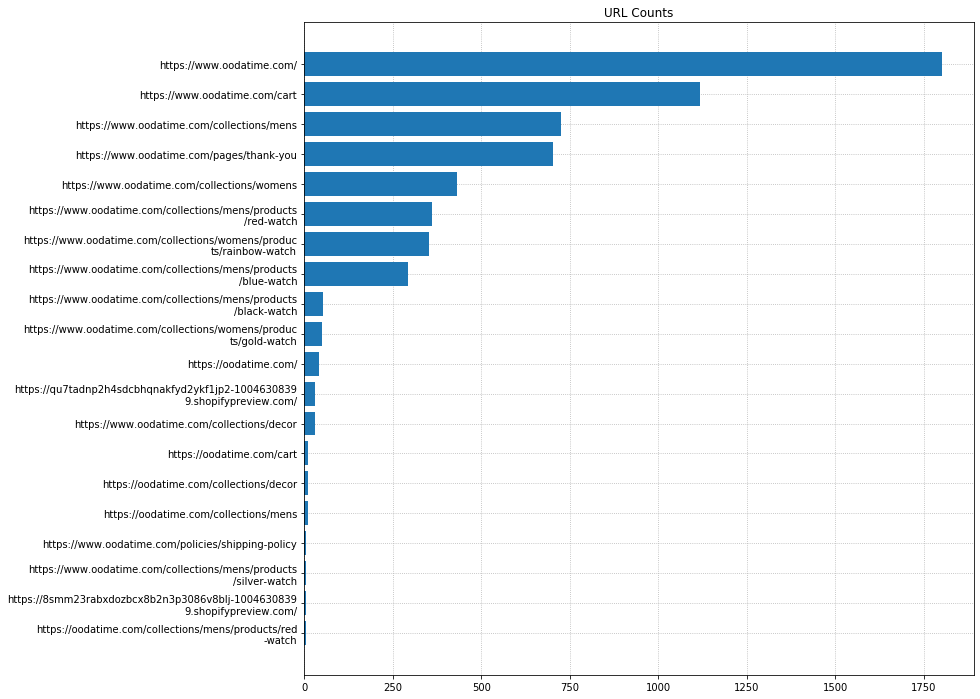

In [10]:
url_counts = get_popular_urls.get_popular(df, useResolvedUrls, LIMITROWS)
TOPCOUNTS = 20 # limit output rows
analyze_traffic.plot_counts_by_freq(url_counts, TOPCOUNTS, "URL Counts", False)

## Show common funnels that include the specified URL

In [5]:
TESTURL = "https://www.oodatime.com/cart"
FUNNELLEN = 3
NUMFUNNELSTOSHOW = 4
top_funnels = frequent_funnel.get_top_funnels_df(TESTURL, FUNNELLEN, useResolvedUrls, df, LIMITROWS)
frequent_funnel.print_top_funnel_counts(top_funnels, NUMFUNNELSTOSHOW)

https://www.oodatime.com/collections/mens
https://www.oodatime.com/collections/mens/products/red-watch
https://www.oodatime.com/cart
Count: 350
https://www.oodatime.com/collections/womens
https://www.oodatime.com/collections/womens/products/rainbow-watch
https://www.oodatime.com/cart
Count: 343
https://www.oodatime.com/collections/mens/products/red-watch
https://www.oodatime.com/cart
https://www.oodatime.com/pages/thank-you
Count: 338
https://www.oodatime.com/collections/mens
https://www.oodatime.com/collections/mens/products/blue-watch
https://www.oodatime.com/cart
Count: 281


## Show conversion statistics for the specified funnel

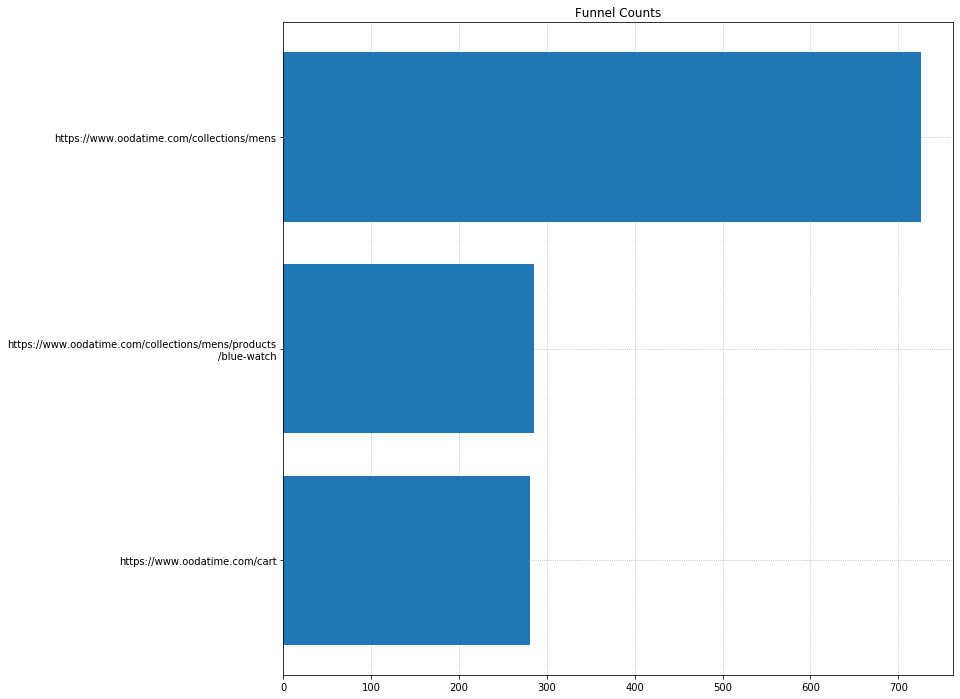

In [6]:
test_funnel=["https://www.oodatime.com/collections/mens",
             "https://www.oodatime.com/collections/mens/products/blue-watch",
             "https://www.oodatime.com/cart"]
funnel_counts = funnel_stats.get_funnel_stats(df, test_funnel, useResolvedUrls, LIMITROWS)
analyze_traffic.plot_counts_by_freq(funnel_counts, 0, "Funnel Counts", True)

## Plot sankey diagram for the specified funnel

In [8]:
sankey_funnel.plot_funnel("Blue Watch Funnel", df, test_funnel, useResolvedUrls, cutoff=4)

## Generate session links for the specified funnel

**Note:** This only works if you are a FullStory user (use your Org ID)

In [8]:
ORGID = "NHQ5G"
STAGING = False
sessions = analyze_traffic.get_sessions_for_funnel(df, test_funnel, useResolvedUrls, ORGID, STAGING, True, 5)
for s in sessions:
    print(s)

https://app.fullstory.com/ui/NHQ5G/session/5761812684374016:6231187614892032
https://app.fullstory.com/ui/NHQ5G/session/4711191910842368:5618683234779136
https://app.fullstory.com/ui/NHQ5G/session/5557830347161600:5815895516545024
https://app.fullstory.com/ui/NHQ5G/session/5298898391302144:4569269984591872
https://app.fullstory.com/ui/NHQ5G/session/5570950109102080:5749597394731008


## Generate session links for a funnel that include a specified click type

In [9]:
ORGID = "NHQ5G"
STAGING = False
clicktype = "rage"
sessions = analyze_traffic.get_sessions_for_funnel_and_click(dffull, test_funnel, clicktype, useResolvedUrls, ORGID, STAGING, True, 5)
for s in sessions:
    print(s)

https://app.fullstory.com/ui/NHQ5G/session/6315220664352768:6548332262490112
https://app.fullstory.com/ui/NHQ5G/session/6333064626077696:6671753113796608


## Print timing stats for a funnel

In [10]:
funtimes = analyze_timing.get_timing_for_funnel(dffull, test_funnel, useResolvedUrls)
analyze_timing.print_timing_averages(test_funnel, funtimes)

https://www.oodatime.com/collections/mens --> https://www.oodatime.com/collections/mens/products/blue-watch
Average: 6.8364806 seconds
Median: 6.584 seconds
https://www.oodatime.com/collections/mens/products/blue-watch --> https://www.oodatime.com/cart
Average: 8.97889 seconds
Median: 8.478 seconds


## Generate timing histogram for 1 step of the funnel

In [11]:
analyze_timing.plot_timing_data(test_funnel, funtimes, 0)

## Generate timing histogram for all steps of the funnel

In [12]:
analyze_timing.plot_timing_data(test_funnel, funtimes, -1)

## Generate inflow and outflow counts for the specified funnel

In [13]:
ingress, egress = funnel_in_outs.get_in_outs(df, test_funnel, useResolvedUrls, LIMITROWS)

## Plot inflow statistics

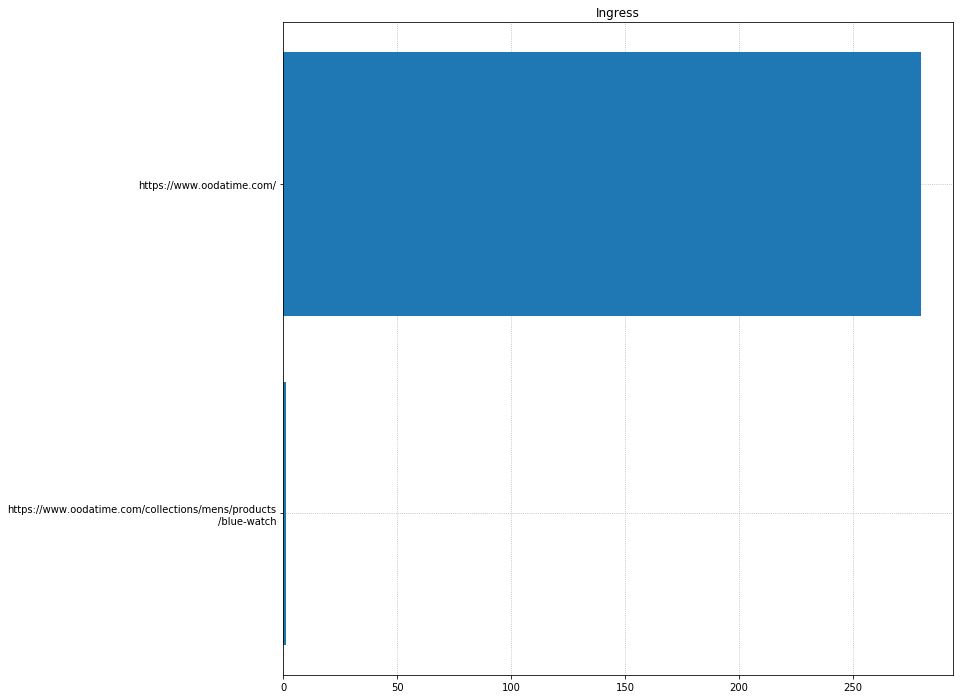

In [14]:
analyze_traffic.plot_counts_by_freq(ingress, 0, "Ingress", False)

## Plot outflow statistics

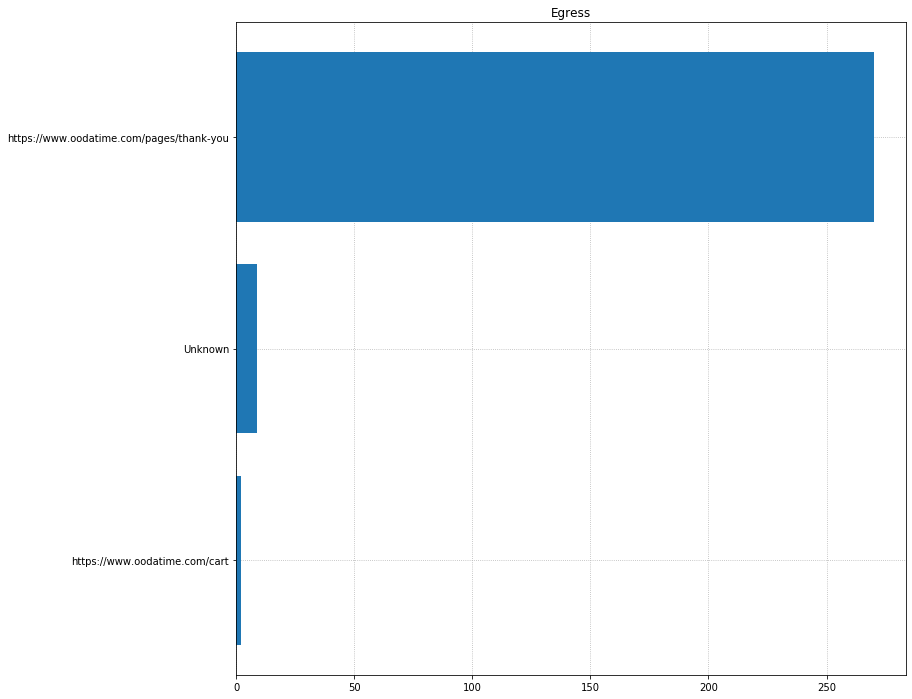

In [15]:
analyze_traffic.plot_counts_by_freq(egress, 0, "Egress", False)

## Plot most visited URLs again (for illustration purposes)

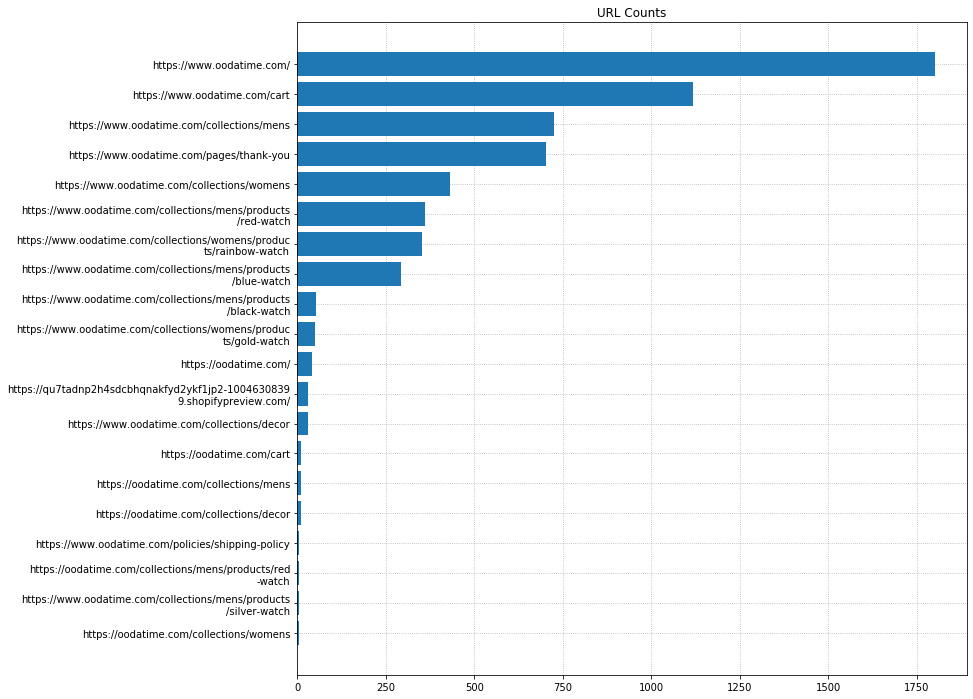

In [16]:
url_counts = get_popular_urls.get_popular(df, useResolvedUrls, LIMITROWS)
TOPCOUNTS = 20
analyze_traffic.plot_counts_by_freq(url_counts, TOPCOUNTS, "URL Counts", False)

## Display current list of URL resolution rules

In [17]:
manage_resolutions.show_rules()

Rules file doesn't exist


## Add URL resolution rule

In [18]:
manage_resolutions.add_rule("/products/(black|blue|red|gold|rainbow)-watch","/products/<any-watch>")

## Display URL resolution rules again

In [19]:
manage_resolutions.show_rules()

/products/(black|blue|red|gold|rainbow)-watch : /products/<any-watch>


## Plot most visited resolved URLs

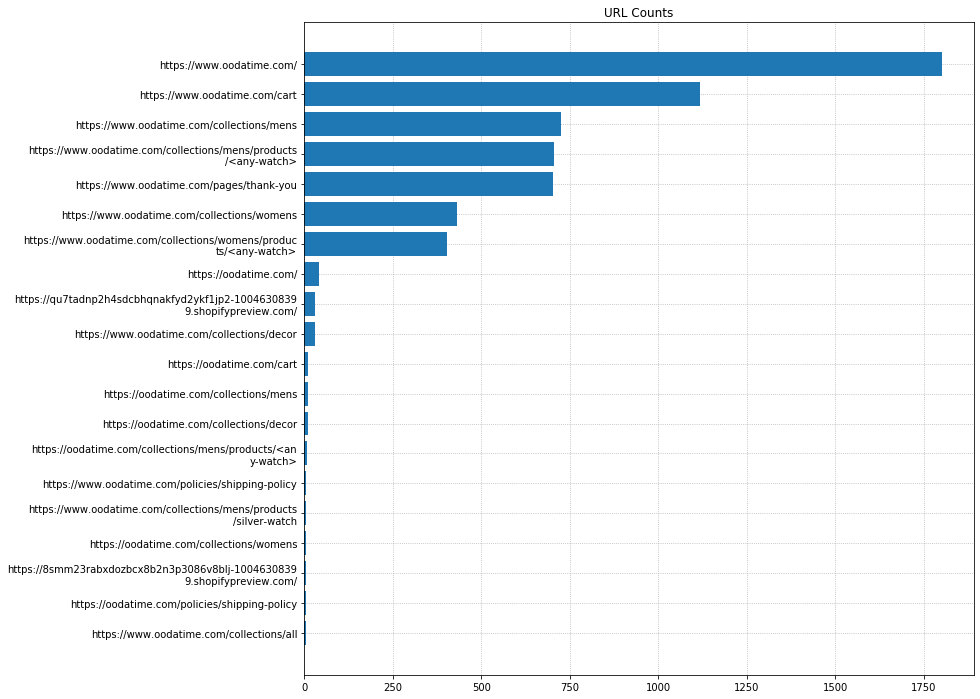

In [20]:
useResolvedUrls = True
url_counts = get_popular_urls.get_popular(df, useResolvedUrls, LIMITROWS)
TOPCOUNTS = 20
analyze_traffic.plot_counts_by_freq(url_counts, TOPCOUNTS, "URL Counts", False)